<a href="https://colab.research.google.com/github/kiranpratyush/cifar-10-using-fastai-transfer-learning/blob/master/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 7.5MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CIFAR)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/cifar10/test'),Path('/root/.fastai/data/cifar10/labels.txt'),Path('/root/.fastai/data/cifar10/train')]

In [ ]:
(path/'train').ls()

(#10) [Path('/root/.fastai/data/cifar10/train/automobile'),Path('/root/.fastai/data/cifar10/train/airplane'),Path('/root/.fastai/data/cifar10/train/deer'),Path('/root/.fastai/data/cifar10/train/frog'),Path('/root/.fastai/data/cifar10/train/cat'),Path('/root/.fastai/data/cifar10/train/bird'),Path('/root/.fastai/data/cifar10/train/horse'),Path('/root/.fastai/data/cifar10/train/dog'),Path('/root/.fastai/data/cifar10/train/truck'),Path('/root/.fastai/data/cifar10/train/ship')]

In [ ]:
datablock = DataBlock((ImageBlock,CategoryBlock),get_items = get_image_files,splitter = GrandparentSplitter(valid_name = 'test'),get_y = parent_label,batch_tfms = aug_transforms())

In [ ]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 60000 items
2 datasets of sizes 50000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/cifar10/train/automobile/23768_automobile.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/cifar10/train/automobile/23768_automobile.png
    applying parent_label gives
      automobile
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(1))


Found 60000 items
2 datasets of sizes 50000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na'

In [ ]:
dls = datablock.dataloaders(path)

In [ ]:
dls.train_ds[0][0].shape

(32, 32)

In [ ]:
learn = cnn_learner(dls,resnet34,metrics =[error_rate,accuracy])
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.683640,1.475948,0.520300,0.479700,01:21


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.946046,0.815152,0.282000,0.718000,01:30
1,0.732836,0.685463,0.238100,0.761900,01:30


SuggestedLRs(lr_min=2.511886486900039e-06, lr_steep=6.309573450380412e-07)

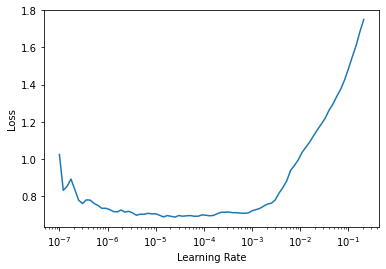

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2,1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.712108,0.680734,0.235300,0.764700,01:30


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.717317,0.665255,0.231400,0.768600,01:31
1,0.687518,0.672740,0.233700,0.766300,01:30


In [ ]:
learn.save("stage-1")

Path('models/stage-1.pth')

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=1.3182567499825382e-06)

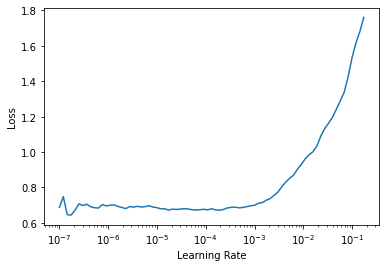

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4,lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.654811,0.637984,0.221400,0.778600,01:29
1,0.619536,0.616898,0.213100,0.786900,01:29
2,0.599117,0.606200,0.208900,0.791100,01:30
3,0.592552,0.582931,0.198500,0.801500,01:30


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

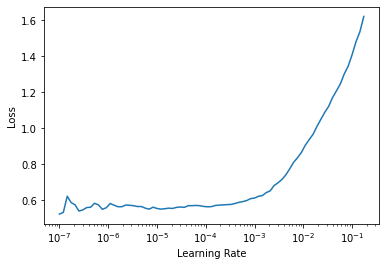

In [ ]:
learn.lr_find()

In [ ]:
learn.save("stage-2")

Path('models/stage-2.pth')

In [ ]:
learn.fit_one_cycle(3,lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.608228,0.580920,0.199800,0.800200,01:30
1,0.576947,0.580308,0.197600,0.802400,01:30
2,0.557701,0.559557,0.192400,0.807600,01:29


In [ ]:
learn.save("stage-3")

Path('models/stage-3.pth')

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=9.12010818865383e-07)

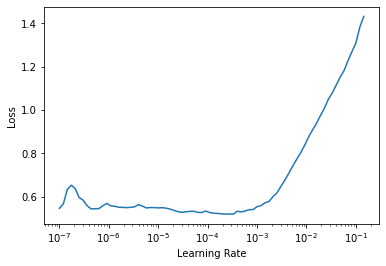

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3,1e-5)
learn.unfreeze()
learn.fit_one_cycle(12,lr_max = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.551083,0.566293,0.195700,0.804300,01:30
1,0.502440,0.543956,0.187300,0.812700,01:29
2,0.526770,0.552947,0.189900,0.810100,01:29


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.519766,0.553277,0.189700,0.810300,01:29
1,0.499812,0.555350,0.190700,0.809300,01:29
2,0.503338,0.550985,0.184400,0.815600,01:29
3,0.499853,0.546044,0.184900,0.815100,01:30
4,0.489594,0.553625,0.189600,0.810400,01:29
5,0.458525,0.534292,0.178800,0.821200,01:29
6,0.471697,0.535539,0.180700,0.819300,01:29
7,0.464632,0.545585,0.186500,0.813500,01:30
8,0.448081,0.545079,0.182800,0.817200,01:30
9,0.437364,0.537728,0.180700,0.819300,01:30


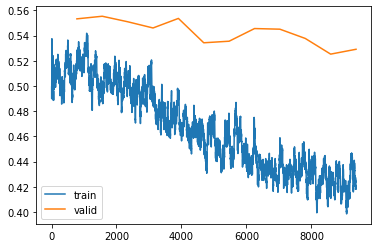

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.save("final-stage")

Path('models/final-stage.pth')

In [ ]:
learn.export("/content/drive/MyDrive/export.pkl")

In [ ]:
cp /content/models/final-stage.pth /content/drive/MyDrive